In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt                    
import seaborn as sns  
import warnings 
import pickle
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from scipy.stats import skew
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Load the data and convert csv to dataframe 

In [ ]:
data=pd.read_csv("C:/Users/ADMIN/Desktop/projects_coding/mainproject/cancer.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#to get number of rows and columns
data.shape

(569, 33)

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#let's check null values in the dataset
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data.drop("Unnamed: 32",axis=1,inplace=True)

In [ ]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: >

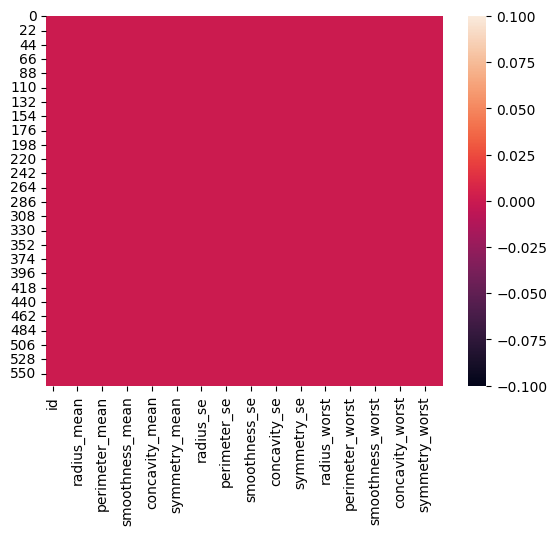

In [ ]:
#checking null values using heatmap
sns.heatmap(data.isnull())

In [ ]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
# In this project, diagnosis is categorical variable because it represents fix number of possible values(ie malignant,benign and the algorithm wants to 0 and 1 not in strings convert to numeric using label encoding)
encoder=LabelEncoder()
data.diagnosis=encoder.fit_transform(data.diagnosis)
# after decoding
data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [ ]:
#converted into B as 0, M as 1

<Axes: xlabel='diagnosis', ylabel='count'>

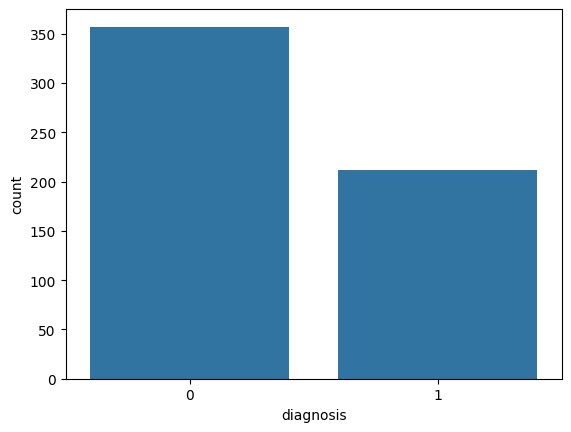

In [ ]:
# visualize it 
sns.countplot(data,x="diagnosis")

<Axes: >

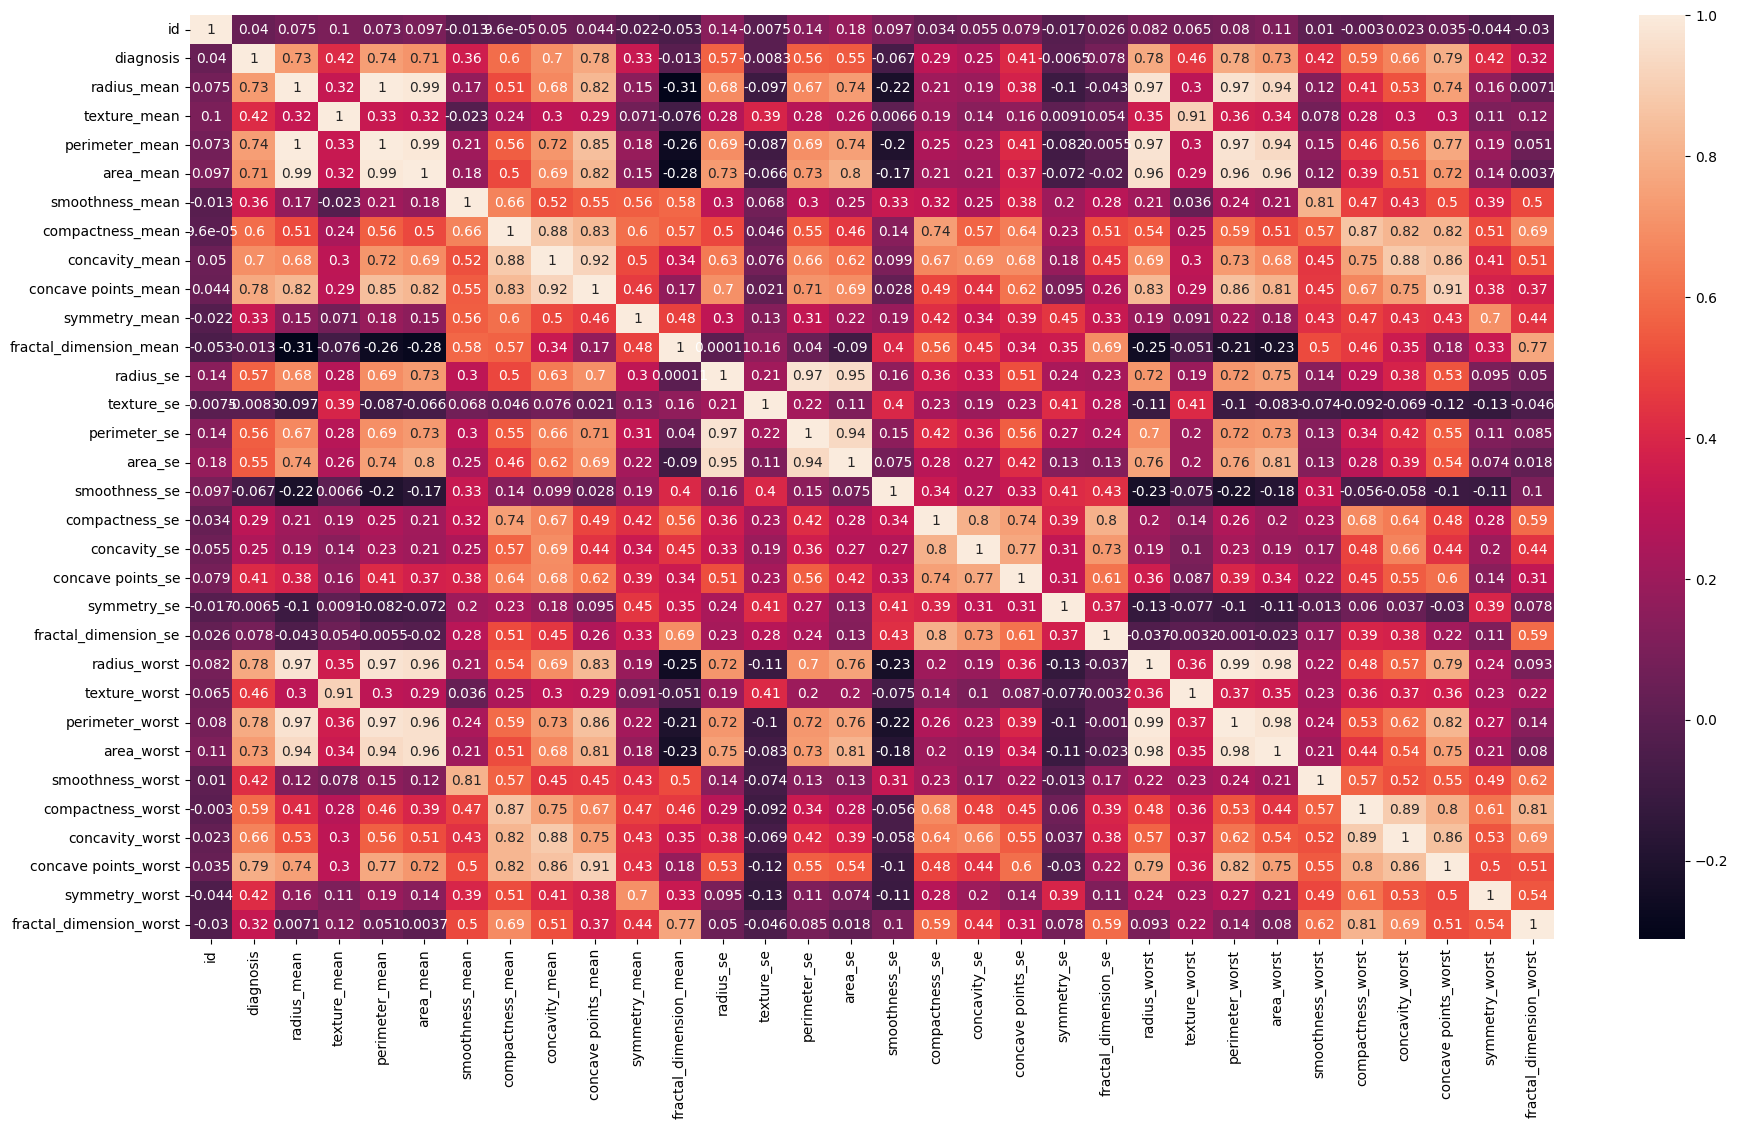

In [ ]:
# let's check the correlation 
plt.figure(figsize=(22,12))
sns.heatmap(data.corr(),annot=True)

In [ ]:
# In this dataset we have morefeatures it is very complex to improve the performance of the model. so we can use the relevant features to predict it. so we use selectk best model.
#It is usedto identify most relevant features in a dataset

select=SelectKBest(score_func=f_classif,k=15)#score_func=f_classif specifies that f_classif (ANOVA F-value) should be used to score the features. ANOVA F-value assesses the relationship between each feature and the target variable y.
x=data.drop("diagnosis",axis=1)
y=data.diagnosis

x_new=select.fit_transform(x,y)
index=select.get_support(indices=True)
features=data.columns[index]

In [ ]:
# These are the relevant features which is selected automatically by selectk best method
features

Index(['diagnosis', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'fractal_dimension_mean',
       'texture_se', 'perimeter_se', 'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst'],
      dtype='object')

In [ ]:
data1=pd.DataFrame(data,columns=['diagnosis', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'fractal_dimension_mean',
       'texture_se', 'perimeter_se', 'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst'])

In [ ]:
data1.shape #thishape shows that 569rows and 15 columns that is selected  

(569, 15)

skew: 0.5270671676029054


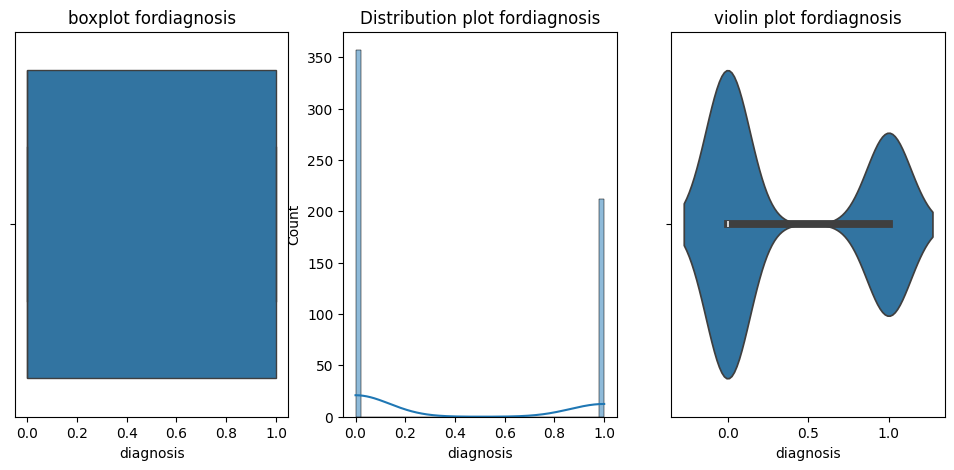

skew: 0.6487335672867015


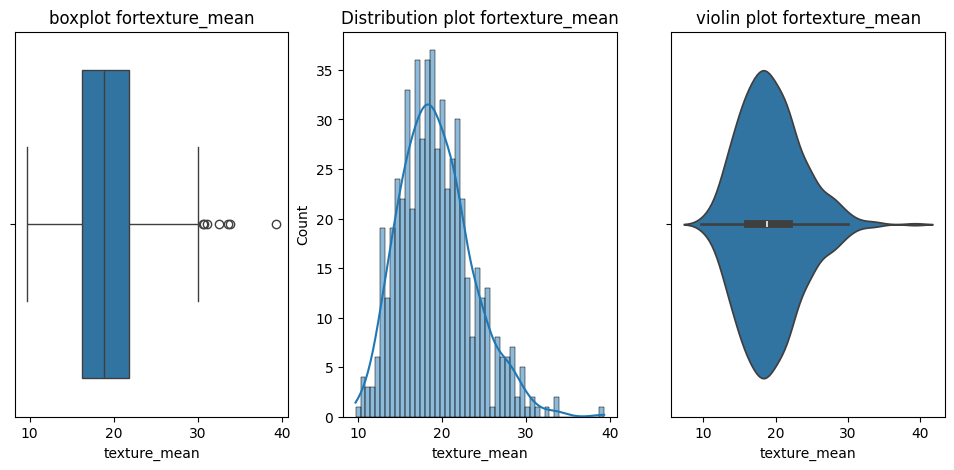

skew: 0.9880369541677213


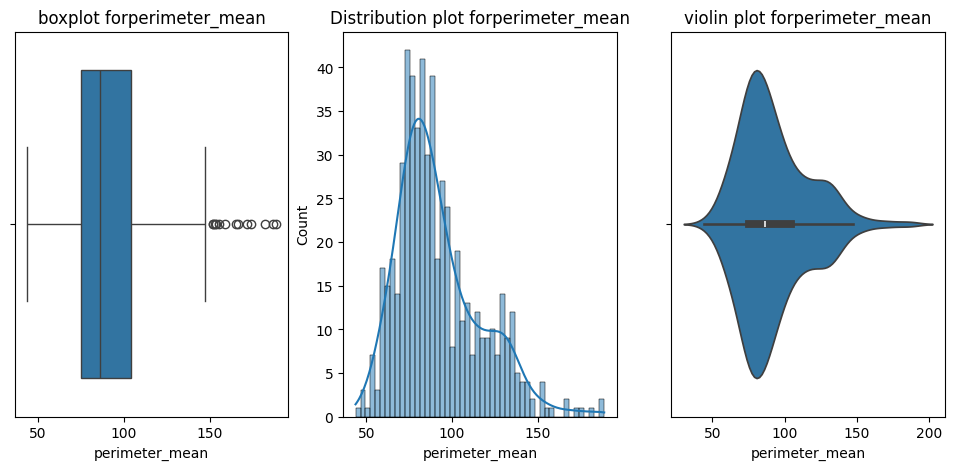

skew: 0.4551199203571718


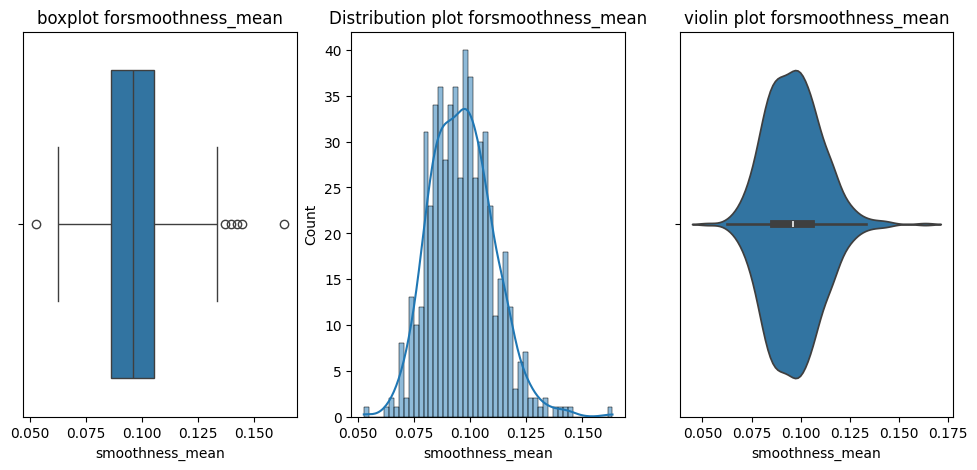

skew: 1.186983323974523


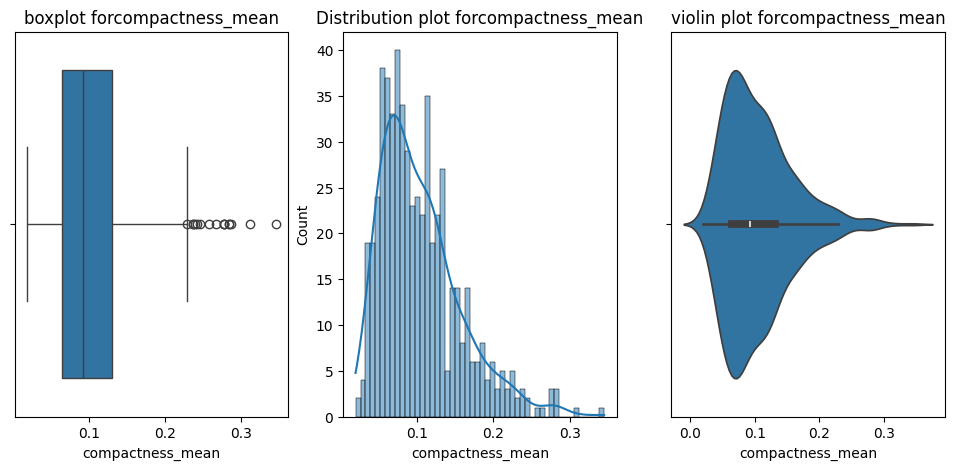

skew: 1.3974832352826647


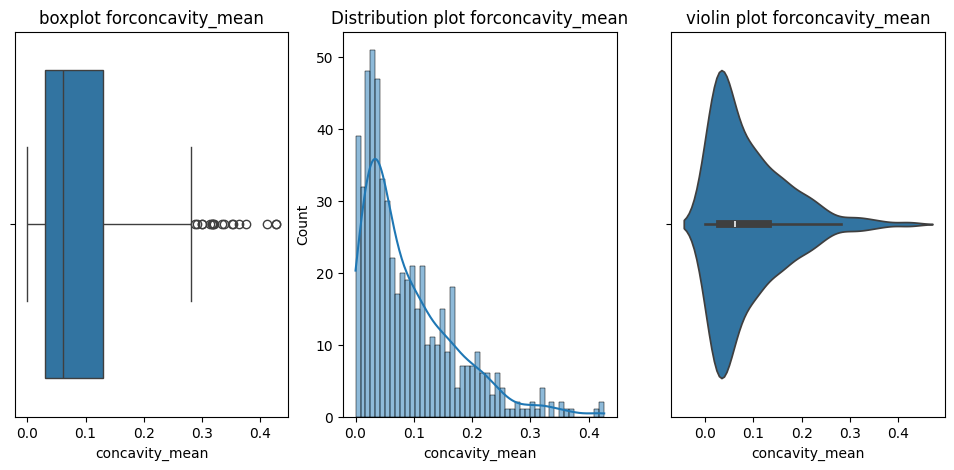

skew: 1.3010473927890858


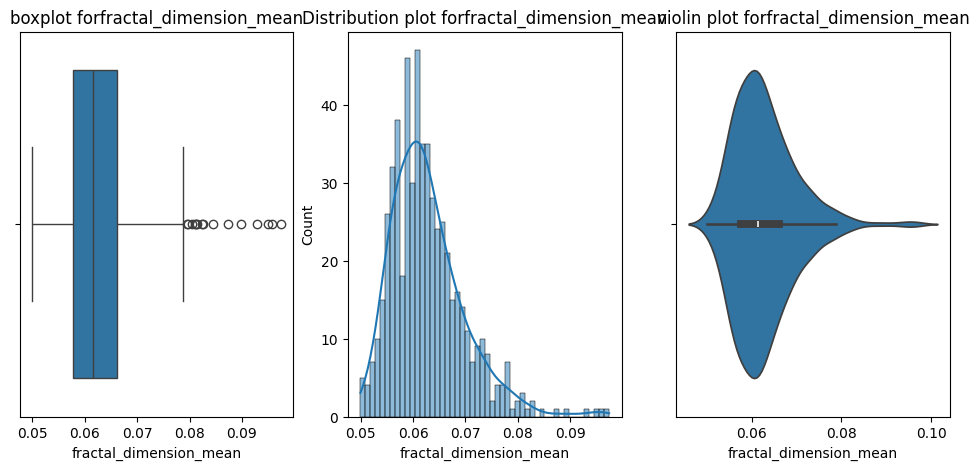

skew: 1.6421002649479612


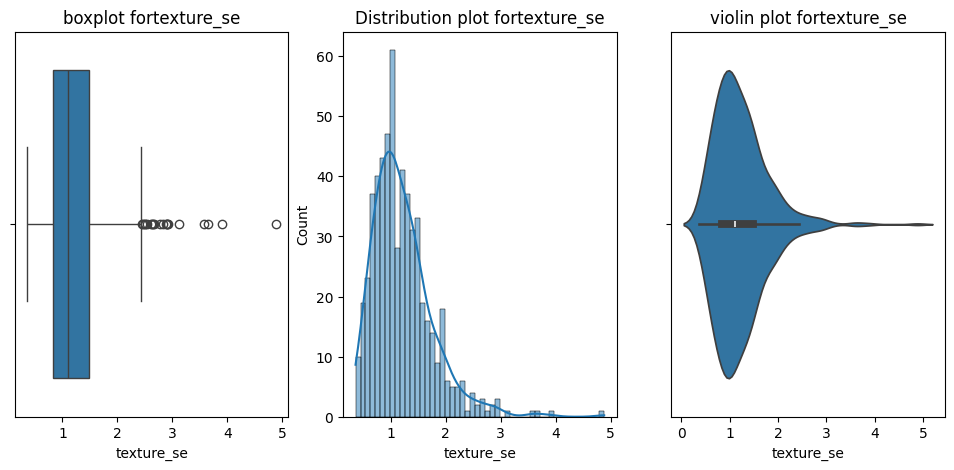

skew: 3.4345304746147067


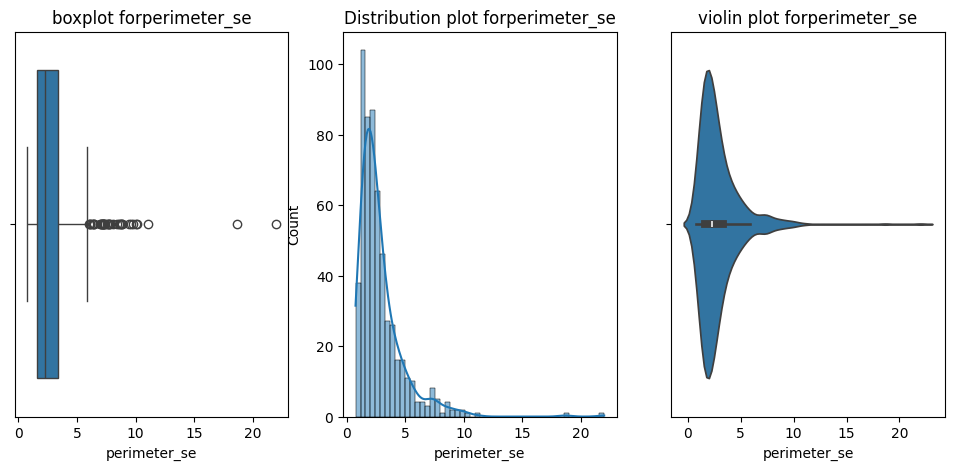

skew: 3.913616654675261


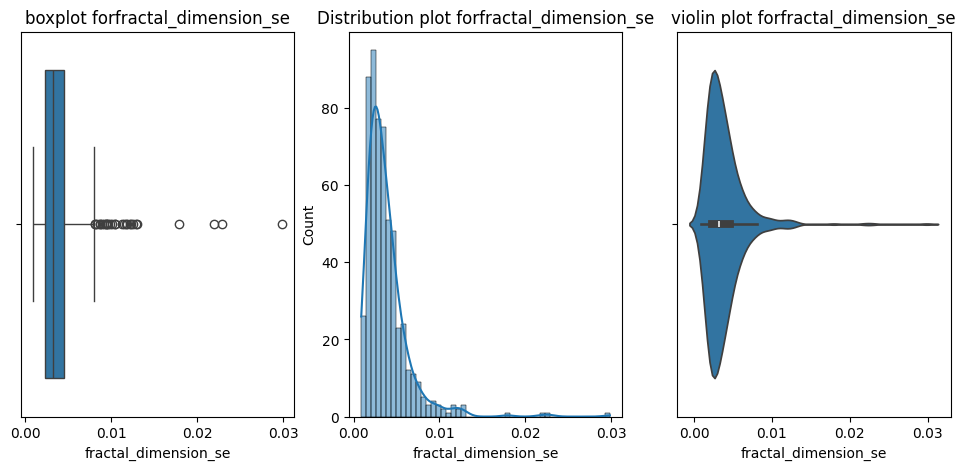

skew: 0.4970066697616781


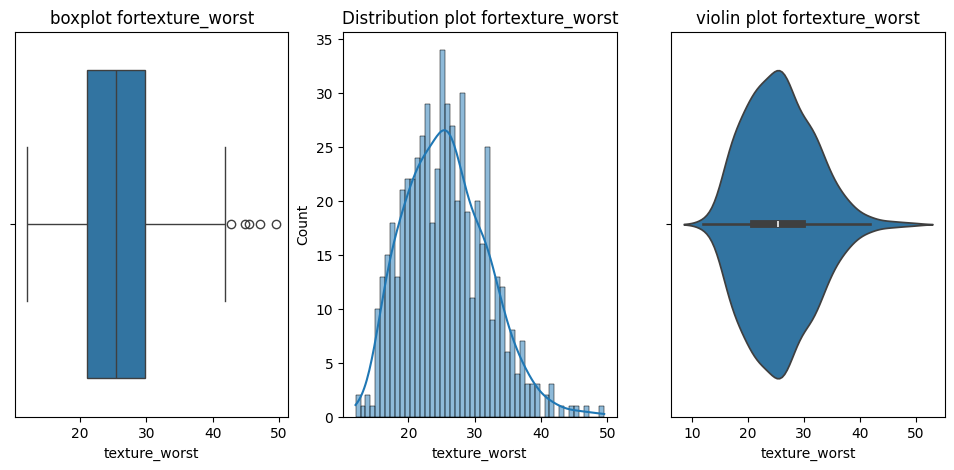

skew: 1.1251876208771259


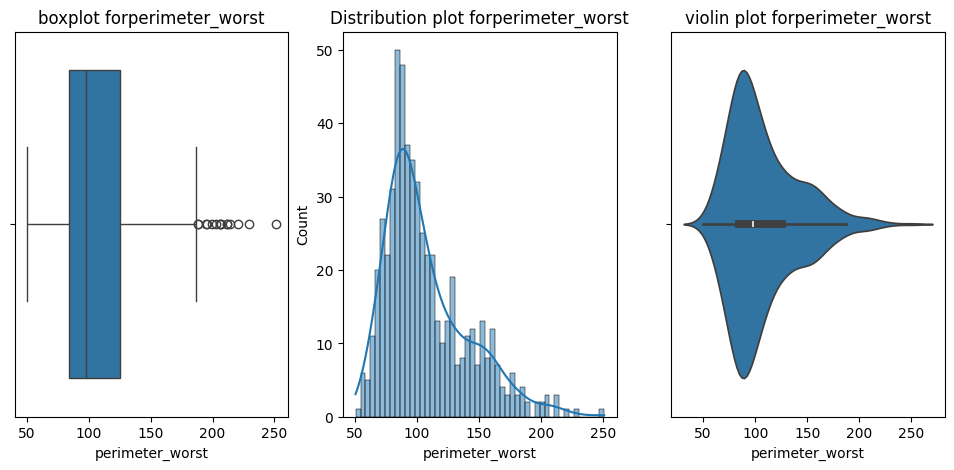

skew: 0.41433004572343024


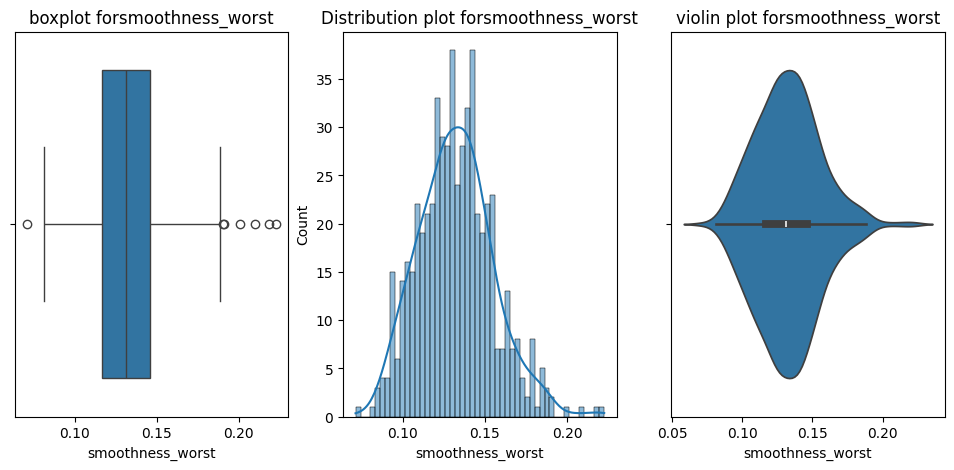

skew: 1.4696674610957545


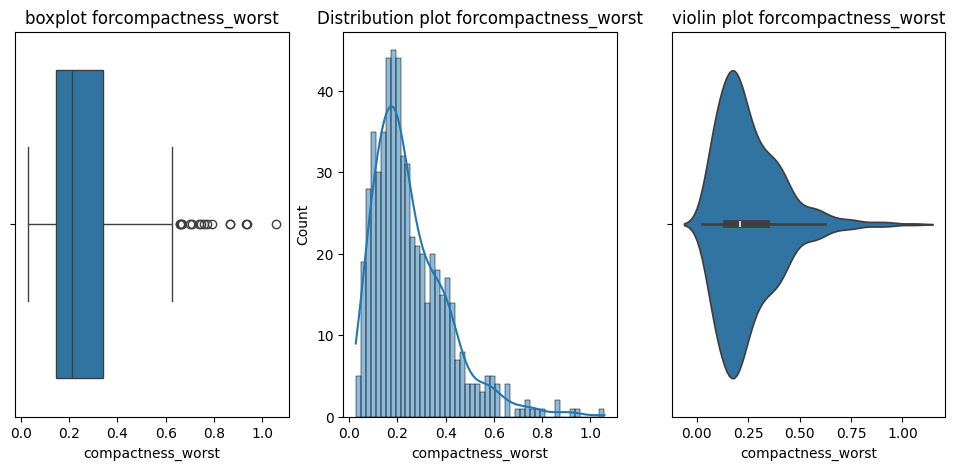

skew: 1.147202339994203


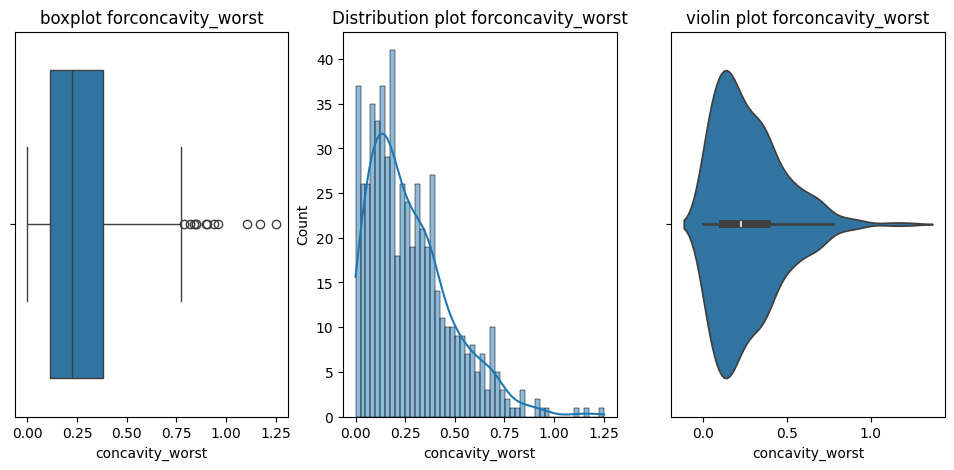

In [ ]:
col=data1.columns
def plot(df,column):
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=column)
    plt.title(f'boxplot for{column}')
    print("skew:",skew(df[column]))

    plt.subplot(1,3,2)
    sns.histplot(data=df,x=column,bins=50,kde=True)
    plt.title(f'Distribution plot for{column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=column)
    plt.title(f'violin plot for{column}')
    plt.show()

col=data1.columns
for i in col:
    plot(data1,i)


In [ ]:
# in this plots we can see that some of the features are skewed and outliers.to remove the outliers
col1=data1.columns
def outlier(df1,column1):
    Q1=df1[column1].quantile(.25)
    Q3=df1[column1].quantile(.75)
    IQR=Q3-Q1
    upperlimit=Q3+(1.5*IQR)
    lowerlimit=Q1-(1.5*IQR)
    df1[column1]=df1[column1].clip(upperlimit,lowerlimit)
    return df1
for item in col1:
    cleaned_data=outlier(data1,item)

skew 0.5270671676029054


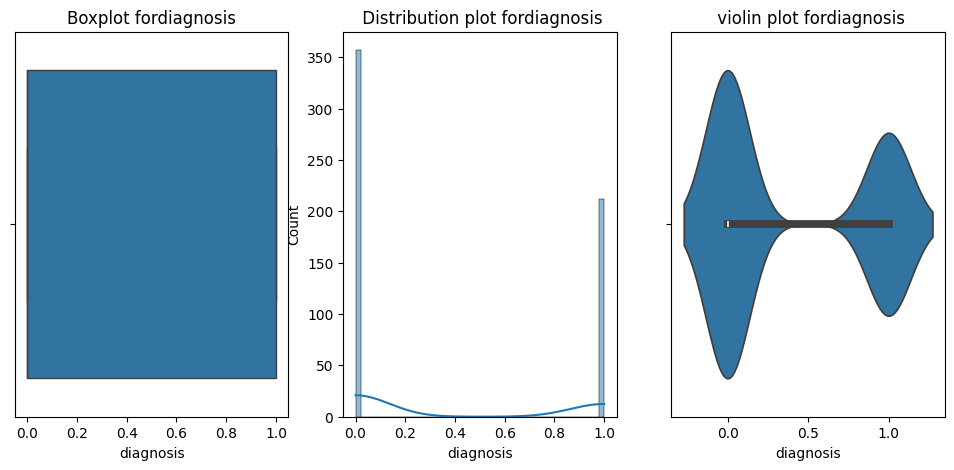

skew 0.44851367077058235


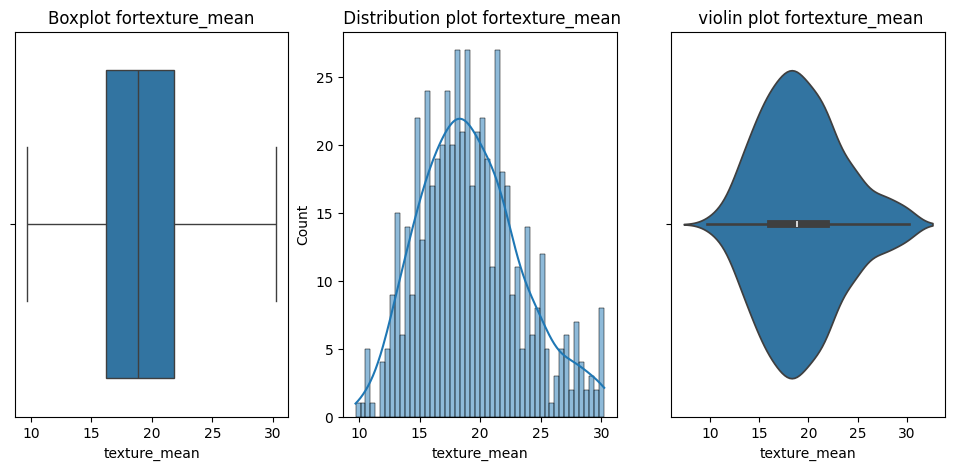

skew 0.6992314337088646


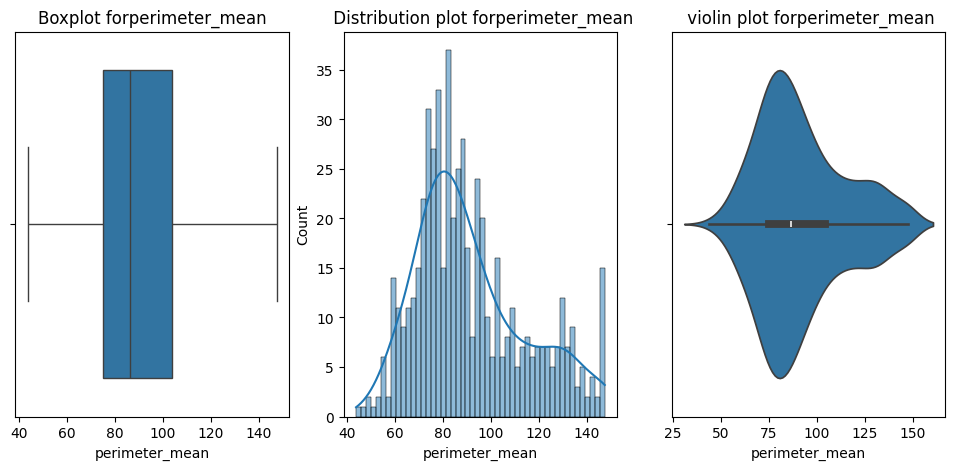

skew 0.257032497029002


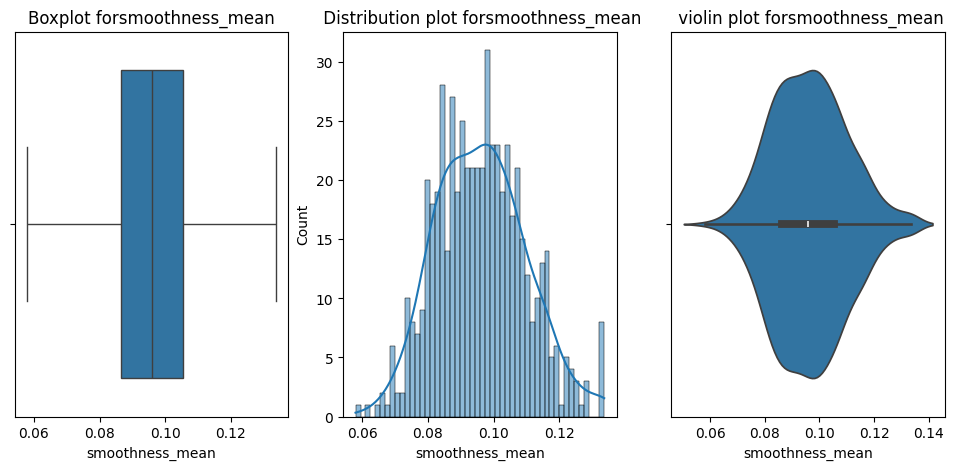

skew 0.8245736893753771


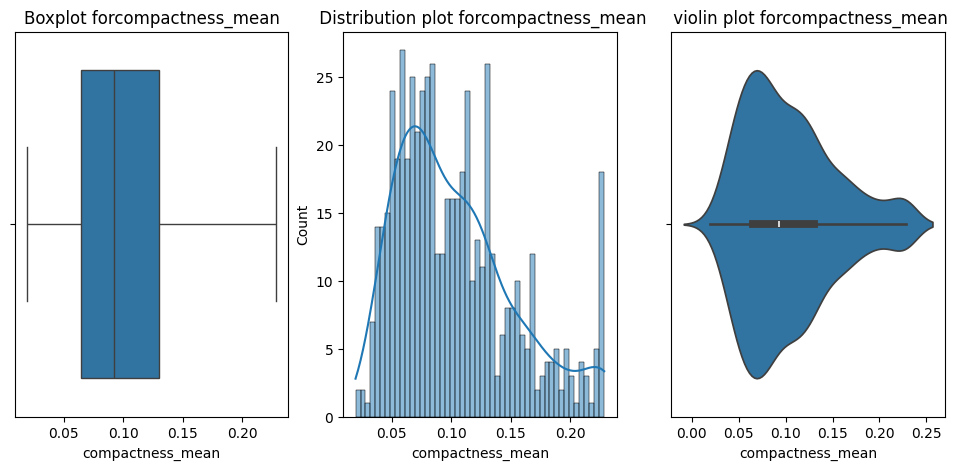

skew 1.021157899122327


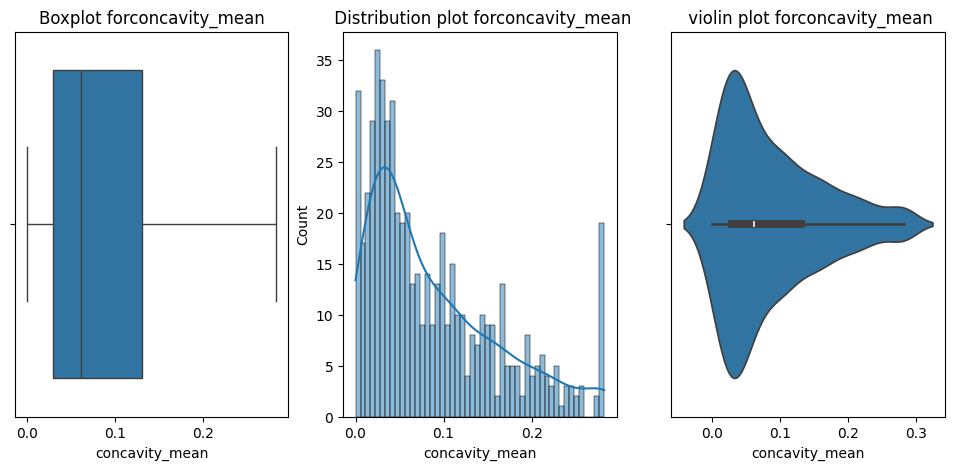

skew 0.6806294566754825


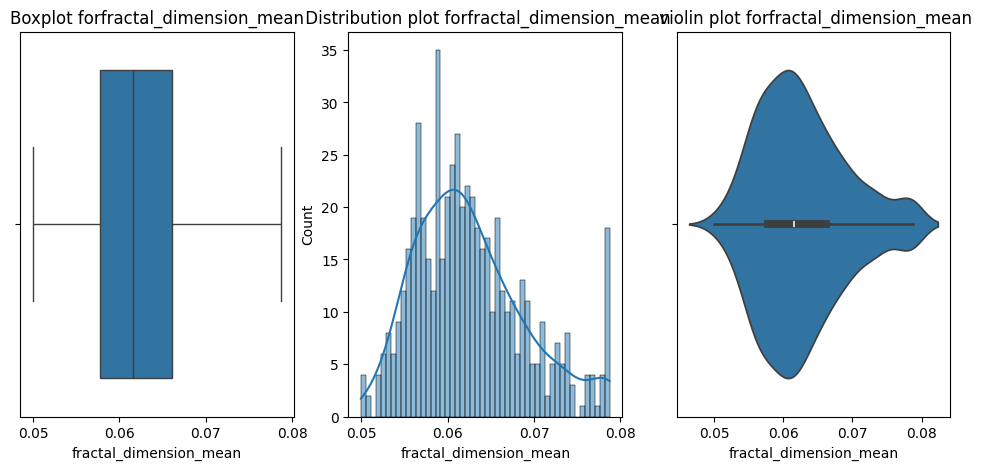

skew 0.7390318206319676


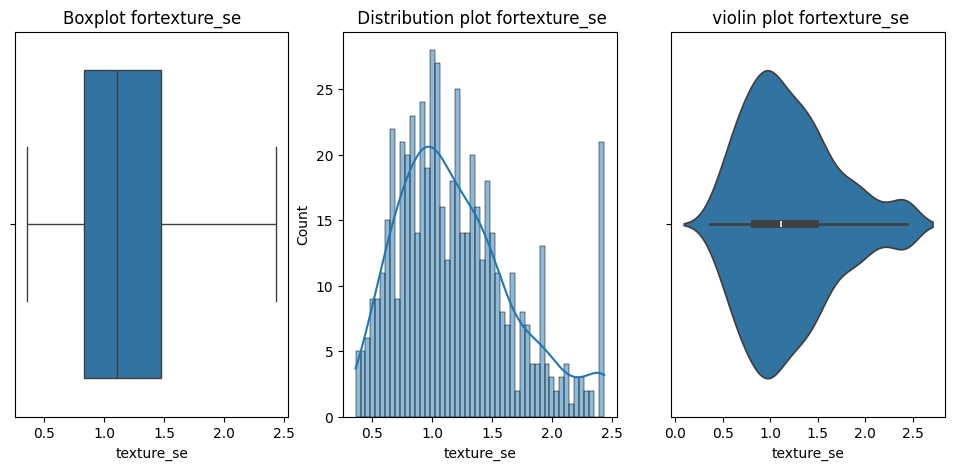

skew 1.0316603491137555


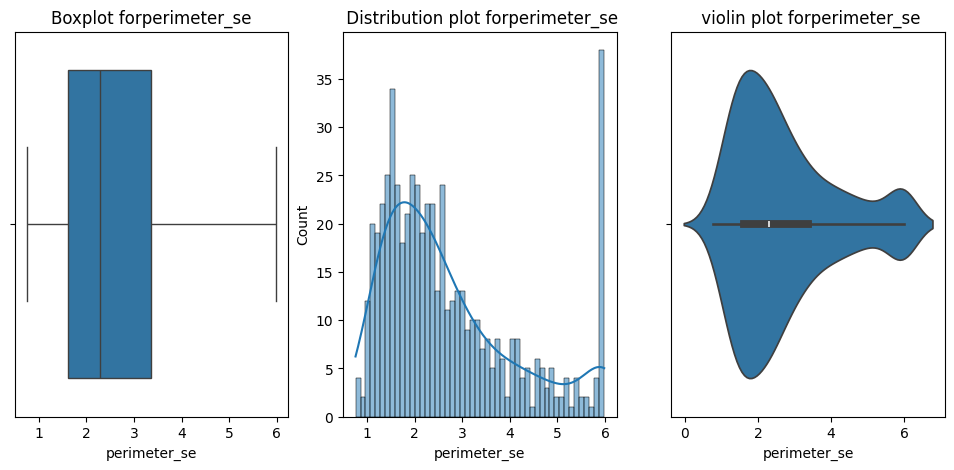

skew 0.9767607399558167


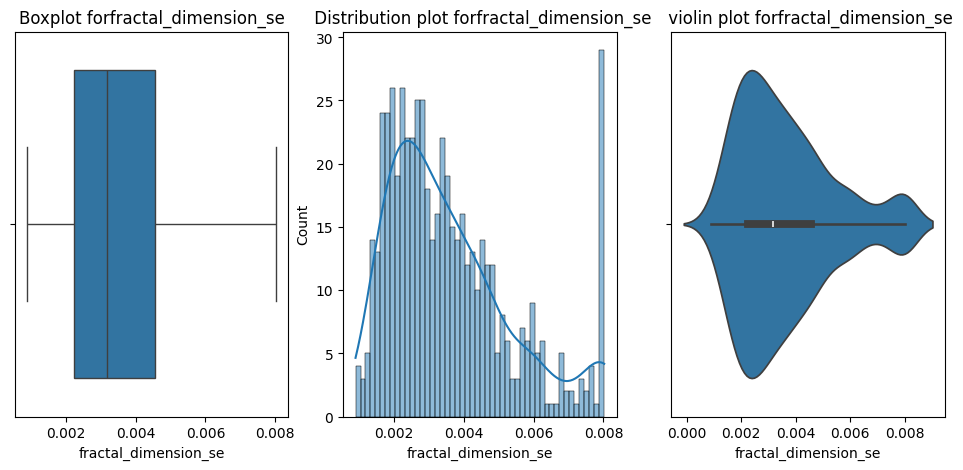

skew 0.3858371723500244


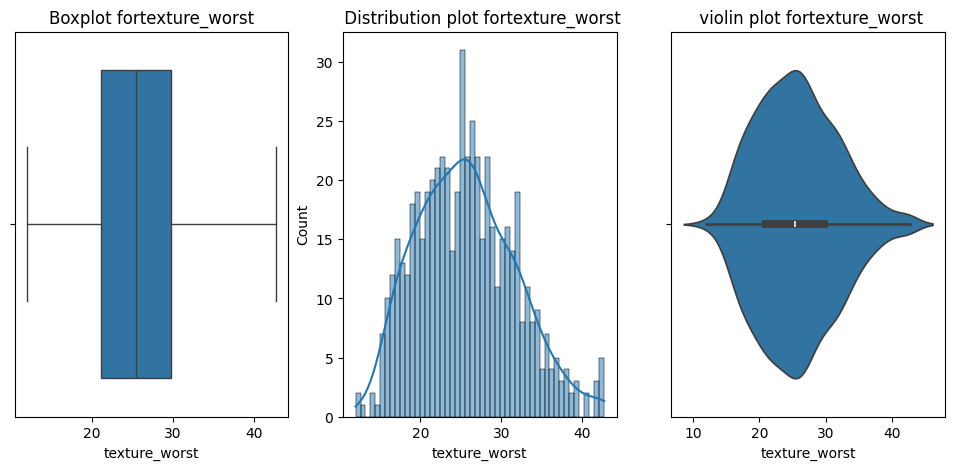

skew 0.8725619780054699


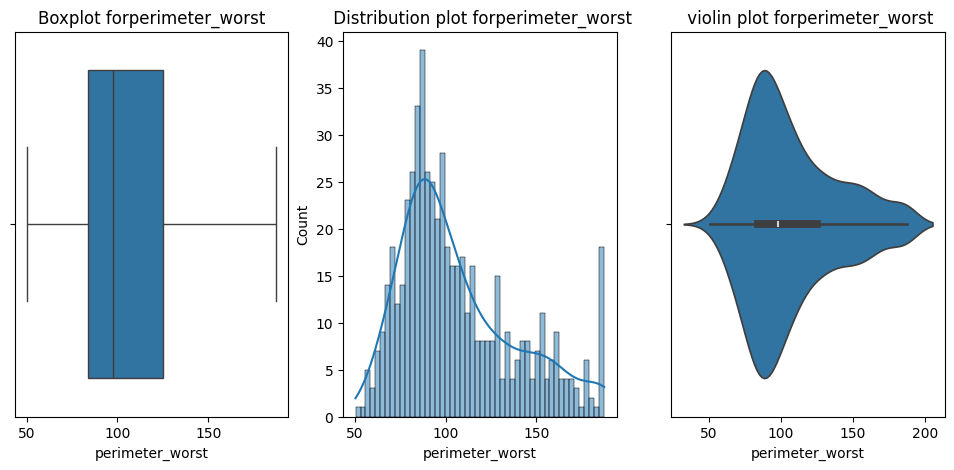

skew 0.2465473453193716


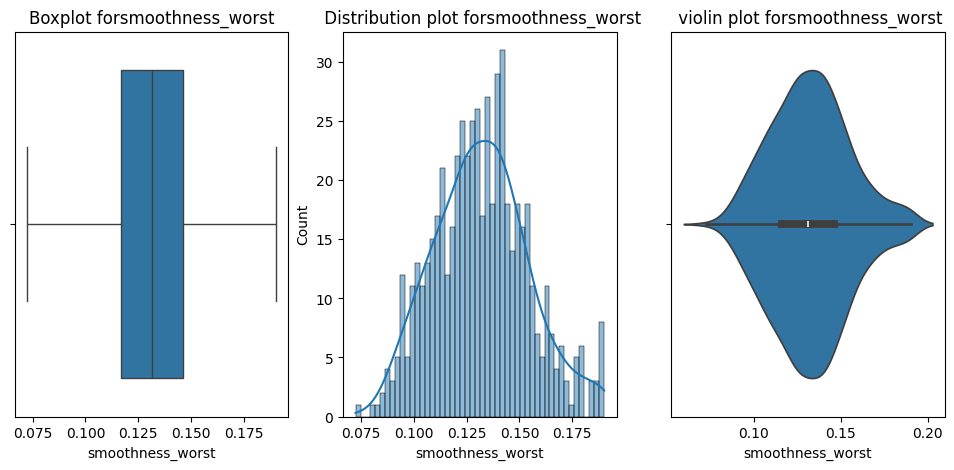

skew 0.9128802589011613


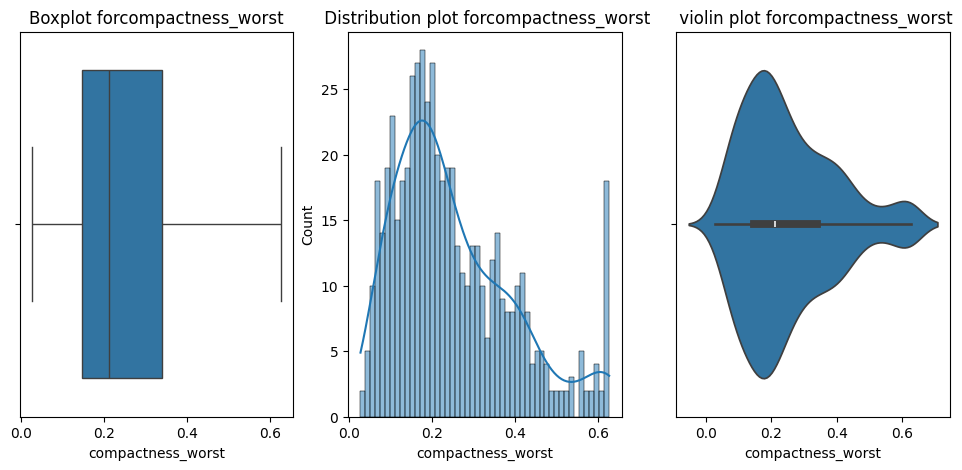

skew 0.8070391625427259


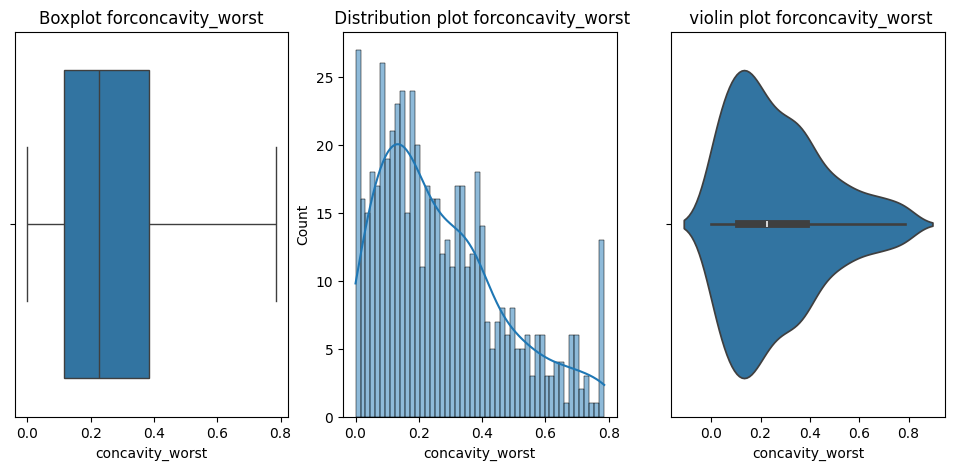

In [ ]:
#let's check after cleaned the outlier
col2=data1.columns
def clean(df2,column2):
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df2,x=column2)
    plt.title(f'Boxplot for{column2}')
    print("skew",skew(df2[column2]))

    plt.subplot(1,3,2)
    sns.histplot(data=df2,x=column2,bins=50,kde=True)
    plt.title(f' Distribution plot for{column2}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df2,x=column2)
    plt.title(f' violin plot for{column2}')
    plt.show()

for item1 in col2:
    plot=clean(cleaned_data,item1)

In [ ]:
cleaned_data.head(75)

,diagnosis,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,fractal_dimension_mean,texture_se,perimeter_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst
0,1,10.38,122.80,0.118400,0.22862,0.28241,0.07871,0.9053,5.9835,0.006193,17.33,184.60,0.1622,0.62695,0.7119
1,1,17.77,132.90,0.084740,0.07864,0.08690,0.05667,0.7339,3.3980,0.003532,23.41,158.80,0.1238,0.18660,0.2416
2,1,21.25,130.00,0.109600,0.15990,0.19740,0.05999,0.7869,4.5850,0.004571,25.53,152.50,0.1444,0.42450,0.4504
3,1,20.38,77.58,0.133695,0.22862,0.24140,0.07875,1.1560,3.4450,0.008023,26.50,98.87,0.1901,0.62695,0.6869
4,1,14.34,135.10,0.100300,0.13280,0.19800,0.05883,0.7813,5.4380,0.005115,16.67,152.20,0.1374,0.20500,0.4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,21.31,123.60,0.090090,0.10290,0.10800,0.05461,0.7975,5.4860,0.001698,26.58,165.90,0.1193,0.23360,0.2687
71,0,14.64,58.79,0.097830,0.15310,0.08606,0.07875,0.8522,3.1680,0.008023,15.67,62.56,0.1207,0.24360,0.1434
72,1,24.52,114.20,0.107100,0.18300,0.16920,0.06487,1.0410,3.7050,0.006299,33.82,151.60,0.1585,0.62695,0.6566
73,1,15.79,90.43,0.100700,0.12800,0.07789,0.06566,0.6205,1.9570,0.003130,20.86,110.30,0.1411,0.35420,0.2779


In [ ]:
cleaned_data.describe()

,diagnosis,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,fractal_dimension_mean,texture_se,perimeter_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,19.254736,91.543787,0.096266,0.103222,0.086937,0.062604,1.198057,2.699075,0.003591,25.648453,106.705369,0.132209,0.249883,0.268754
std,0.483918,4.187510,23.047218,0.013685,0.049386,0.073900,0.006418,0.485500,1.402982,0.001780,6.054406,31.957777,0.022320,0.142851,0.197461
min,0.000000,9.710000,43.790000,0.057975,0.019380,0.000000,0.049960,0.360200,0.757000,0.000895,12.020000,50.410000,0.072500,0.027290,0.000000
25%,0.000000,16.170000,75.170000,0.086370,0.064920,0.029560,0.057700,0.833900,1.606000,0.002248,21.080000,84.110000,0.116600,0.147200,0.114500
50%,0.000000,18.840000,86.240000,0.095870,0.092630,0.061540,0.061540,1.108000,2.287000,0.003187,25.410000,97.660000,0.131300,0.211900,0.226700
75%,1.000000,21.800000,104.100000,0.105300,0.130400,0.130700,0.066120,1.474000,3.357000,0.004558,29.720000,125.400000,0.146000,0.339100,0.382900
max,1.000000,30.245000,147.495000,0.133695,0.228620,0.282410,0.078750,2.434150,5.983500,0.008023,42.680000,187.335000,0.190100,0.626950,0.785500


In [ ]:
# preprocessed the data, data is get ready to fit into model

cleaned_data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [ ]:
# data is imbaalced so we use smote
X=cleaned_data.drop("diagnosis",axis=1)
Y=cleaned_data.diagnosis
X_,Y_=SMOTETomek().fit_resample(X,Y)

In [ ]:
Y_.value_counts()

diagnosis
1    352
0    352
Name: count, dtype: int64

In [ ]:
scale=StandardScaler()
x_scale=scale.fit_transform(X_)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,Y_,test_size=0.3,random_state=101) # split the train and test data

In [ ]:
# Let's train the model
classification_model=SVC()
classification_model.fit(x_train,y_train)
y_pred=classification_model.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("classification_report",classification_report(y_test,y_pred))
print("\n")
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))
      



Accuracy: 0.9811320754716981
classification_report               precision    recall  f1-score   support

           0       0.96      1.00      0.98       100
           1       1.00      0.96      0.98       112

    accuracy                           0.98       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.98      0.98      0.98       212



confusion_matrix
[[100   0]
 [  4 108]]


<Axes: >

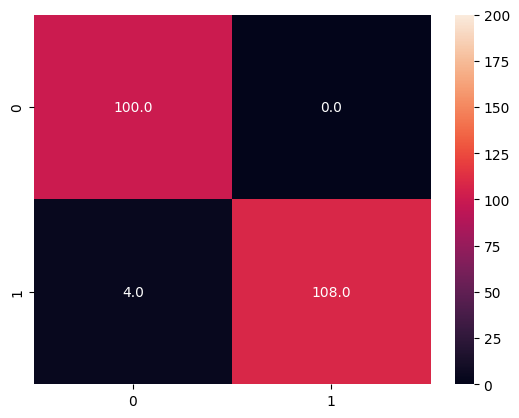

In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,vmin=0,vmax=200,fmt="0.1f")

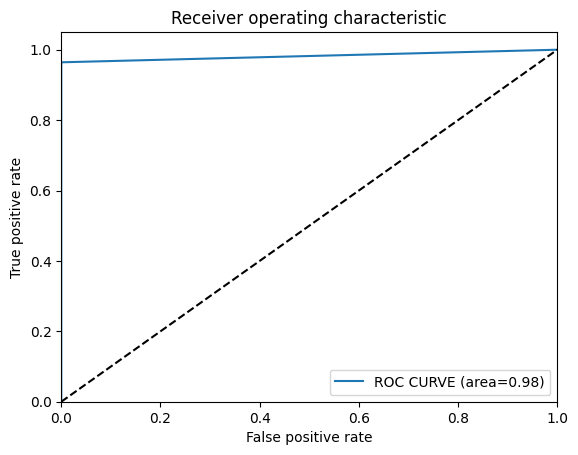

In [ ]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='ROC CURVE (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
with open("classification_model.pkl","wb") as f1:
    pickle.dump(classification_model,f1)
with open("classification_scale.pkl","wb")as f2:
    pickle.dump(scale,f2)

In [ ]:
test=np.array([[16.52,79.19,0.091720,0.06829,0.03372,0.05914,1.0250,1.7400,0.002304,23.21,89.71,0.1176,0.18430,0.1703]])
test1=scale.fit_transform(test)
y_p=classification_model.predict(test1)
if y_p==1:
    print("Malignant")
else:
    print("Benign")

Malignant


In [ ]:
test1=np.array([[24.540,47.92,0.057975,0.04362,0.00000,0.05884,1.42800,2.5480,0.002783,30.37,59.16,0.08996,0.06444,0.0000]])
test2=scale.fit_transform(test1)
y_pr=classification_model.predict(test2)
if y_pr==1:
    print("Malignaant")
else:
    print("Benign")

Malignaant
